Crossed validation (5-fold) : 0.849 ± 0.017

Classification report :

              precision    recall  f1-score   support

        high       0.92      0.91      0.92       267
      medium       0.82      0.83      0.82       266
        weak       0.91      0.90      0.91       267

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



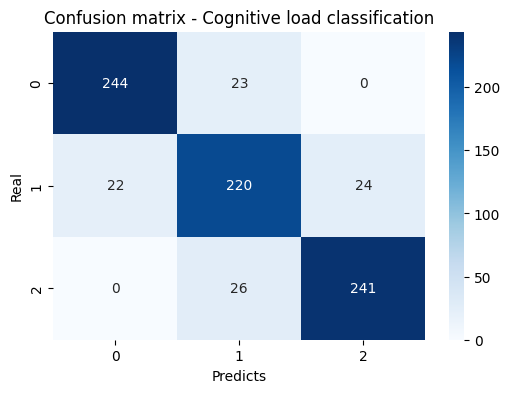

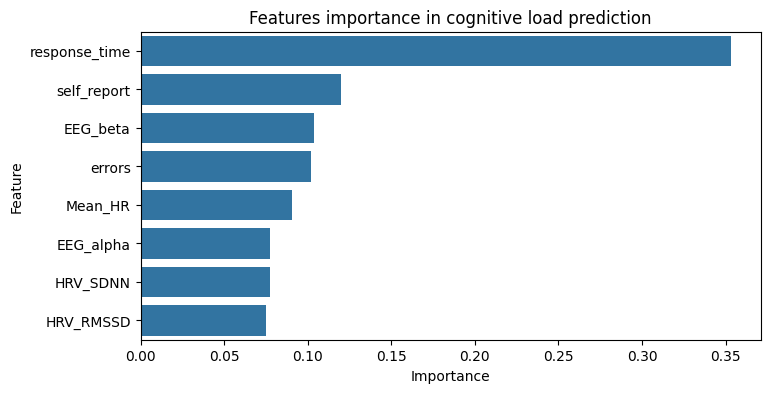

In [3]:
# =========================================================
# COGNITIVE LOAD MULTIMODAL CLASSIFIER EXAMPLE
# =========================================================

# Imports
from pathlib import Path
import sys
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset with simulated data
data_path = Path("../Data/cog_data.csv").resolve()
cog_set = pd.read_csv(data_path, index_col=False)
df = cog_set.copy()

# ---------------------------------------------------------
# 1. Data Preprocessing
# ---------------------------------------------------------

X = df.drop(columns=["cognitive_load", "cognitive_load_simple", "learner_id"])
y = df["cognitive_load_simple"] #or y = df["cognitive_load"] to try to classify a more complex cognitive load
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------
# 2. Designing our pipeline
# ---------------------------------------------------------

# Random Forest might be a good choice here to start but it is debatable. The scaling is also very simple here, it can be enhanced with more complex data.
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight="balanced"
    ))
])

# ---------------------------------------------------------
# 3. Training and validation
# ---------------------------------------------------------

rf_pipeline.fit(X_train, y_train)

# Crossed validation
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5)
print(f"Crossed validation (5-fold) : {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# ---------------------------------------------------------
# 4. Test set evaluation
# ---------------------------------------------------------

y_pred = rf_pipeline.predict(X_test)
print("\nClassification report :\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Cognitive load classification")
plt.xlabel("Predicts")
plt.ylabel("Real")
plt.show()

# ---------------------------------------------------------
# 5. Interpretation - Variable impact
# ---------------------------------------------------------

# Get importance of each feature
rf_model = rf_pipeline.named_steps["model"]
importances = rf_model.feature_importances_

feat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x="Importance", y="Feature", data=feat_importances)
plt.title("Features importance in cognitive load prediction")
plt.show()

# ---------------------------------------------------------
# 6. Scientific Discussion
# ---------------------------------------------------------
# - Relative contribution of canals (EEG, HRV, behavioral)
# - model robustness and perspectives (deep learning, multimodal fusion)
# - potential biases and ecological validity